<a href="https://colab.research.google.com/github/FrannGallo/SistemaRecomm/blob/main/Sprint_3_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Apartir de aca importo lo que creaba desde visual code porque si no me tira error collab
Importamos csv:
* Train
* Test
* interactions_matrix
* Interactions_selected

In [6]:
interactions_selected= pd.read_csv('/content/drive/MyDrive/Data Science 2023/Sprints/Sprint 3/interactions_selected.csv')

In [49]:
train= pd.read_csv('/content/drive/MyDrive/Data Science 2023/Sprints/Sprint 3/train.csv')
test= pd.read_csv('/content/drive/MyDrive/Data Science 2023/Sprints/Sprint 3/test.csv')

ParserError: ignored

In [ ]:
interactions_matrix= pd.read_csv('/content/drive/MyDrive/Data Science 2023/Sprints/Sprint 3/interactions_matrix.csv')


In [ ]:
interactions_matrix=interactions_matrix.set_index('user_id',inplace=False)

In [ ]:
interactions_matrix=interactions_matrix.iloc[0:10000,:]  #La disminuimos a 10000

In [ ]:
interactions_selected.user_id.nunique()

In [ ]:
interactions_selected.anime_id.nunique()

Transformamos la matris por mucha dispersion y gran cantidad de datos

Y el diccionario para futura referencia:

In [50]:
user_id = list(interactions_matrix.index)
user_dict = {}
counter = 0
for i in user_id:
    user_dict[i] = counter
    counter += 1

In [14]:
item_id = list(interactions_matrix.columns)
item_dict = {}
counter = 0
for i in item_id:
    item_dict[i] = counter
    counter += 1

## Llamamos el modelo


In [19]:
pip install lightfm

In [15]:
import joblib


In [16]:
from lightfm import LightFM

In [17]:
model= joblib.load('/content/drive/MyDrive/Data Science 2023/Sprints/Sprint 3/modelo.pkl')

In [18]:
model

## Generamos una funcion de recomendacion y la probamos


In [20]:
def recomm(model, interactions, user_id, user_dict, item_dict, nrec_items = 10, show = True):

    n_users, n_items = interactions.shape
    user_x = user_dict[user_id]

    scores = pd.Series(model.predict(user_x,np.arange(n_items)))
    scores.index = interactions.columns
    scores = list(pd.Series(scores.sort_values(ascending=False).index))

    known_items = list(pd.Series(interactions.loc[user_id,:] \
                                [interactions.loc[user_id,:] > 0].index).sort_values(ascending=False))

    #Filtro de items que ya leyó el usuario
    scores = [x for x in scores if x not in known_items]
    recomms = scores[0:nrec_items]

    if show == True:
        print ("User: " + str(user_id))
        print("Known Likes:")
        counter = 1
        for i in known_items:
            print(str(counter) + '- ' + str(i))
            counter+=1

        print("\n Recommended Items:")

        counter = 1
        for i in recomms:
            print(str(counter) + '- ' + str(i))
            counter+=1
    return recomms

Probamos la función para un usuario al azar. Al poner la opción show=True nos imprime los known likes y recomms.



In [21]:
interactions_matrix.sample

<bound method NDFrame.sample of            1    5    6    7    8   15   16   17   18   19  ...  47639  47778  \
user_id                                                    ...                 
17       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
19       8.0  6.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
42       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
47       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
60       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
...      ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...    ...    ...   
140700   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
140739   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
140751   9.0  8.0  0.0  0.0  7.0  8.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
140764   0.0  0.0  7.0  0.0  0.0  0.0  7.0  0.0  0.0  7.0  ...    0.0    0.0   
140765  

In [22]:
recomms_test = recomm(model, interactions_matrix, 19 , user_dict, item_dict, show=True)

User: 19
Known Likes:
1- 9989
2- 9782
3- 9760
4- 9756
5- 974
6- 9656
7- 9617
8- 9488
9- 9479
10- 9471
11- 9379
12- 934
13- 9253
14- 9213
15- 9204
16- 9135
17- 9074
18- 9062
19- 8861
20- 885
21- 884
22- 8769
23- 8768
24- 875
25- 8713
26- 8675
27- 8577
28- 8525
29- 8516
30- 849
31- 8475
32- 8426
33- 8424
34- 8187
35- 8101
36- 8100
37- 8074
38- 7902
39- 7805
40- 7785
41- 777
42- 7728
43- 7711
44- 770
45- 7647
46- 7588
47- 7465
48- 7338
49- 7311
50- 73
51- 72
52- 71
53- 7059
54- 6987
55- 6956
56- 6884
57- 6795
58- 6746
59- 6675
60- 6641
61- 6637
62- 6610
63- 66
64- 6594
65- 659
66- 6573
67- 6547
68- 6505
69- 6380
70- 6372
71- 6347
72- 6219
73- 6211
74- 617
75- 6127
76- 6045
77- 601
78- 6007
79- 5998
80- 597
81- 5909
82- 587
83- 585
84- 572
85- 570
86- 5681
87- 565
88- 5630
89- 548
90- 543
91- 54
92- 5365
93- 5341
94- 5300
95- 522
96- 5205
97- 5204
98- 513
99- 512
100- 5114
101- 5081
102- 5
103- 4970
104- 496
105- 4835
106- 4789
107- 47
108- 468
109- 4663
110- 4565
111- 44
112- 4382
113- 43

In [23]:
recomms_test

['11759',
 '16508',
 '1536',
 '6548',
 '30279',
 '19841',
 '4232',
 '31966',
 '9254',
 '5116']

### Cold start


In [55]:
#Esta linea busca los promedios de los anime y saca los 10 primero, son las peliculas que vamos a recomendar si tenemos un coldstar
# que son aquellos usuarios que estan en el set de test pero no en el set de train, como no tenemos datos sobre ellos,
#les recomendamos el top 10 mejor rankeadas, tambien pueden ser las 10 mas vistas y asi
cold_start_recomms = train.groupby("anime_id").agg({"rating": "count"})\
                      .sort_values(by="rating", ascending=False)\
                      .head(10)\
                      .index\
                      .to_list()

A todos los usuarios cold start les recomendaremos:

In [56]:
cold_start_recomms

[6547, 11757, 9253, 16498, 4224, 1535, 5081, 19815, 1575, 5114]

Ahora generemos recomendaciones para todos los usuarios.

Primero comenzamos armando un listado de usuarios "non cold" a los cuales les daremos recomms personalizadas.

In [27]:
#No tenemos cold users
users = interactions_matrix.index.unique()
non_cold_users = train.user_id.unique()

print(len(users), len(non_cold_users))

10000 25000


In [29]:
from tqdm import tqdm
recomms_dict = {
    "user": [],
    "recomms": [],
    "cold": []
}

for user in tqdm(users):

  # Recomms personalizadas
  if user in non_cold_users:
    user_recomms = recomm(model, interactions_matrix, user, user_dict, item_dict, nrec_items = 20, show = False)
    recomms_dict["user"].append(user)
    recomms_dict["recomms"].append(user_recomms)
    recomms_dict["cold"].append(False) #Para luego tener identificados a los usuarios cold

  # Recomms cold
  else:
    recomms_dict["user"].append(user)
    recomms_dict["recomms"].append(cold_start_recomms)
    recomms_dict["cold"].append(True) #Para luego tener identificados a los usuarios cold

100%|██████████| 10000/10000 [21:50<00:00,  7.63it/s]


Ahora tenemos un diccionario de recomedaciones. Lo vamos a convertir en dataframe para poder manipularlo más fácil (como estamos acostumbrados)

In [30]:
recomms_df = pd.DataFrame(recomms_dict)

In [31]:
recomms_df[recomms_df['cold'] == False]

,user,recomms,cold
0,17,"[1, 16508, 1536, 6548, 30279, 19841, 4232, 319...",False
1,19,"[11759, 16508, 1536, 6548, 30279, 19841, 4232,...",False
2,42,"[1, 11759, 16508, 1536, 6548, 30279, 19841, 42...",False
3,47,"[1, 11759, 16508, 1536, 6548, 30279, 19841, 42...",False
4,60,"[1, 11759, 16508, 1536, 30279, 6548, 19841, 42...",False
...,...,...,...
9995,140700,"[1, 16508, 1536, 6548, 30279, 19841, 4232, 319...",False
9996,140739,"[1, 11759, 16508, 1536, 6548, 30279, 19841, 42...",False
9997,140751,"[11759, 16508, 1536, 6548, 30279, 19841, 4232,...",False
9998,140764,"[1, 11759, 16508, 1536, 6548, 19841, 4232, 319...",False


In [32]:
recomms_df.user.nunique()

10000

In [33]:
recomms_df.cold.value_counts()

False    10000
Name: cold, dtype: int64

In [34]:
test.head()

,Unnamed: 0,user_id,anime_id,rating,watching_status
0,39183716,127265,38297,0,1
1,44951831,145883,1818,6,2
2,106282669,343691,32454,6,2
3,50247785,162953,39196,0,3
4,28817180,93352,16774,0,6


Primero ordenamos libros según los ratings (mayor a menor) que dieron los usuarios en el set de test.

Luego, agrupamos y armamos un listado de libros para cada usuario.

Este es el listado "ideal" contra el que vamos a comparar nuestras recomendaciones.

In [35]:
test

,Unnamed: 0,user_id,anime_id,rating,watching_status
0,39183716,127265,38297,0,1
1,44951831,145883,1818,6,2
2,106282669,343691,32454,6,2
3,50247785,162953,39196,0,3
4,28817180,93352,16774,0,6
...,...,...,...,...,...
6574909,75414978,244173,7596,0,2
6574910,72173570,233600,31914,0,6
6574911,31545603,102310,32,7,2
6574912,10880451,35448,8460,0,2


In [36]:
#Esto ordena, por usuario y por raitng (en esa priroridad)
# Y a esto le agrega una columna de
# aca agrupa por usuario y le agrega columna de animes que alla votado
# Como es el set de test, van a ser las peliculas que deberiamos recomendarles
ideal_recomms = test[test.watching_status != 0].sort_values(by="rating", ascending=False)\
                  .groupby(["user_id"], as_index=False)\
                  .agg({"anime_id": "unique"})
print(ideal_recomms.shape)
ideal_recomms

(25000, 2)


,user_id,anime_id
0,17,"[28677, 21863, 20709, 20939, 8516, 10049, 6347..."
1,19,"[30276, 32281, 12115, 1530, 457, 14741, 166, 2..."
2,42,"[877, 21603, 14347, 4224, 147, 8425, 26349, 99..."
3,47,"[16498, 1735, 23755, 32281, 5341, 38000, 36456..."
4,60,"[2605, 892, 24765, 6768, 8675, 31995, 18179, 1..."
...,...,...
24995,353326,"[35247, 29803, 33926, 6547, 4224, 30015, 36999..."
24996,353365,"[32281, 186, 29803, 30296, 43, 45, 32268, 3919..."
24997,353390,"[5141, 910, 6347, 3627, 121, 574, 23283, 23209..."
24998,353395,"[1530, 513, 801, 101, 429, 209, 5681, 32, 1312..."


Ahora vamos a medir MAP. Para esto nos basaremos en este ejemplo: https://github.com/Datathon2021/Recomendador/blob/main/Ejemplos/ejemplo_map.ipynb

Sklearn también tiene funciones para medir NDCG, etc.


Primero que nada, vamos a unir en un mismo dataframe las recomendaciones nuestras con el set ideal.

In [41]:
df_map = ideal_recomms.merge(recomms_df, how="right", left_on="user_id", right_on="user")[["user_id", "anime_id", "recomms"]]
df_map.columns = ["user_id", "ideal", "recomms"]
df_map

,user_id,ideal,recomms
0,17,"[28677, 21863, 20709, 20939, 8516, 10049, 6347...","[1, 16508, 1536, 6548, 30279, 19841, 4232, 319..."
1,19,"[30276, 32281, 12115, 1530, 457, 14741, 166, 2...","[11759, 16508, 1536, 6548, 30279, 19841, 4232,..."
2,42,"[877, 21603, 14347, 4224, 147, 8425, 26349, 99...","[1, 11759, 16508, 1536, 6548, 30279, 19841, 42..."
3,47,"[16498, 1735, 23755, 32281, 5341, 38000, 36456...","[1, 11759, 16508, 1536, 6548, 30279, 19841, 42..."
4,60,"[2605, 892, 24765, 6768, 8675, 31995, 18179, 1...","[1, 11759, 16508, 1536, 30279, 6548, 19841, 42..."
...,...,...,...
9995,140700,"[6547, 15583, 19163, 17641, 10456, 10793, 8425...","[1, 16508, 1536, 6548, 30279, 19841, 4232, 319..."
9996,140739,"[35849, 35557, 37447, 36456, 31964, 25777, 358...","[1, 11759, 16508, 1536, 6548, 30279, 19841, 42..."
9997,140751,"[28891, 30503, 13759, 31933, 199, 2890, 5258, ...","[11759, 16508, 1536, 6548, 30279, 19841, 4232,..."
9998,140764,"[18115, 31988, 13851, 11759, 6676, 21881, 1889...","[1, 11759, 16508, 1536, 6548, 19841, 4232, 319..."


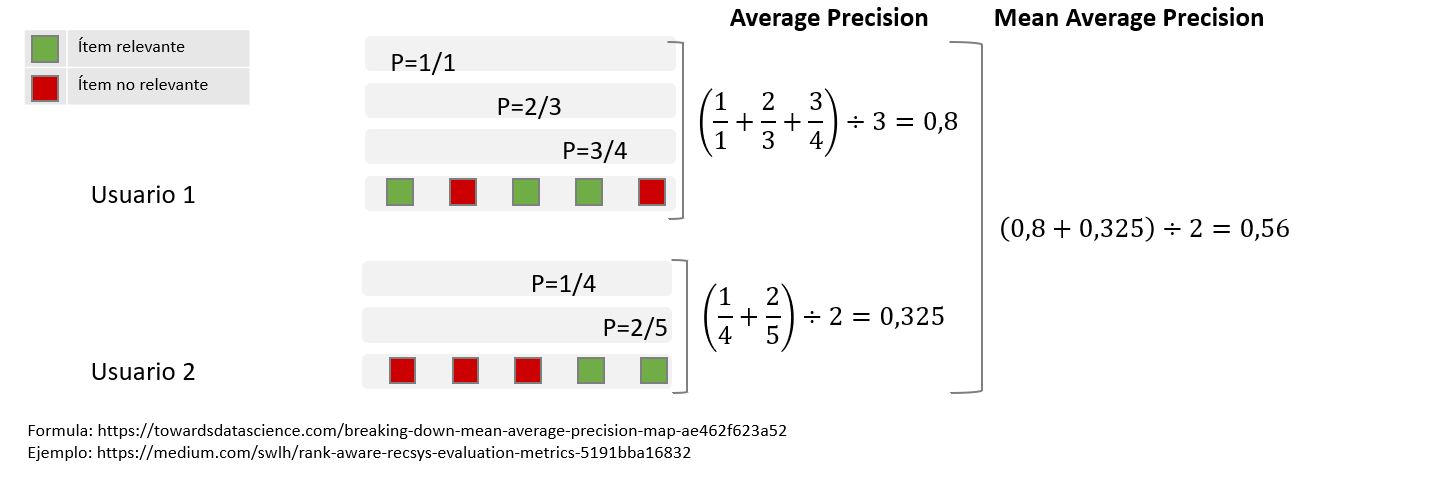

In [42]:
aps = [] # lista vacía para ir almacenando la AP de cada recomendación

for pred, label in tqdm(df_map[["ideal", "recomms"]].values):
  n = len(pred) # cantidad de elementos recomendados
  arange = np.arange(n, dtype=np.int32) + 1. # indexamos en base 1
  rel_k = np.in1d(pred[:n], label) # lista de booleanos que indican la relevancia de cada ítem
  tp = np.ones(rel_k.sum(), dtype=np.int32).cumsum() # lista con el contador de verdaderos positivos
  denom = arange[rel_k] # posiciones donde se encuentran los ítems relantes
  ap = (tp / denom).sum() / len(label) # average precision
  aps.append(ap)


  0%|          | 0/10000 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/numpy/lib/arraysetops.py:608: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)
100%|██████████| 10000/10000 [00:02<00:00, 3634.31it/s]


In [52]:
MAP = np.mean(aps)
print(f'mean average precision = {round(MAP, 6)}')

mean average precision = 1e-06


In [44]:
df_map.tail()

,user_id,ideal,recomms
9995,140700,"[6547, 15583, 19163, 17641, 10456, 10793, 8425...","[1, 16508, 1536, 6548, 30279, 19841, 4232, 319..."
9996,140739,"[35849, 35557, 37447, 36456, 31964, 25777, 358...","[1, 11759, 16508, 1536, 6548, 30279, 19841, 42..."
9997,140751,"[28891, 30503, 13759, 31933, 199, 2890, 5258, ...","[11759, 16508, 1536, 6548, 30279, 19841, 4232,..."
9998,140764,"[18115, 31988, 13851, 11759, 6676, 21881, 1889...","[1, 11759, 16508, 1536, 6548, 19841, 4232, 319..."
9999,140765,"[10165, 16157, 66, 16904, 10067, 9617, 36990, ...","[1, 11759, 16508, 1536, 19841, 4232, 31966, 92..."


In [45]:
np.in1d(pred[:n], label)

/usr/local/lib/python3.10/dist-packages/numpy/lib/arraysetops.py:608: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [60]:
#Vamos a revisar por usuario, como consulta

user=140700
ideal_u=df_map[df_map["user_id"] == user].recomms
print(ideal_u[user_dict[user]])

recomm_u=df_map[df_map["user_id"] == user].ideal
print(recomm_u[user_dict[user]])

np.in1d(ideal_u[user_dict[user]] ,recomm_u[user_dict[user]])

['1', '16508', '1536', '6548', '30279', '19841', '4232', '31966', '9254', '5116', '1576', '31244', '22335', '30842', '31044', '10622', '20509', '8078', '5082', '21899']
[ 6547 15583 19163 17641 10456 10793  8425 33502 32281 32937 35790   849
 40496 33012 14741  5341  6702 34019 30544 15199 32902 24231 36475 37779
 34445 16067 31553  1887 20479  2993 22729 30831  4224 18671 32901  6747
 38145 23273 38793 32380 31418 15809 30711  5955 35589 39597  6381 11553
  9260 23233 20709 25519  5163 20021 38659 39940 27387  9041 39575  1652
 12685 34599 33352  9776 34148 40540 11633  3712 27655 27775 31374 38790
 32407  3072 25647 11077 11783  2476 33478 33360 38383 17074 25283 30869
 15451   570    79 12467 23487 18441 34812  9736  7144 10604 13357 38104
 34561 25285  4903 39991 39701 35363 16099 34934 34525 13859  7375   837
 37744 38573 32936 37799 20919    32 17513 40010 34077 39195 38915 10495
 33263 10568 37450  2104 33309 14921 35313  2403 30383 40507  6884 37293
 36455  6324 40656 23283 358

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])